# This script will analyse a biological sample of Convalaria root for TD-FLIM
# Images collected at LNMA (script under construction)
 Frequency of acquisition 80 Mhz
 Pixel size of ? nm



## Parameters

In [1]:
### Acquisition parameters
frequency = 80 # MHz

### Parameters for MSSR
sigma_px = 2.43
fwhm = 2.35 * sigma_px  # Full Width at Half Maximum
amp = 1  # Amplitude
order = 1  # Order
mesh = True  # Optional, default is True
ftI = False  # Optional, default is False
intNorm = False  # Optional, default is True

## Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Install libraries

In [3]:
# Uncomment to install
print("Installing necessary libraries...")
#!pip install numpy==1.26.0 >  /dev/null 2>&1
!pip install phasorpy > /dev/null 2>&1
#!pip install PyQt5 > /dev/null 2>&1
#!pip install napari[all] > /dev/null 2>&1
#!pip install git+https://github.com/RoccoDAnt/napari-superres.git > /dev/null 2>&1
#!pip install cmcrameri
print("Libraries installed successfully.")

Installing necessary libraries...
Libraries installed successfully.


## Load required libraries

In [5]:
import pandas as pd
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter

from phasorpy.plot import plot_phasor_image, PhasorPlot
from phasorpy.phasor import phasor_threshold, phasor_filter_median

from phasorpy.color import CATEGORICAL
from phasorpy.cursors import (
    mask_from_circular_cursor,
    mask_from_elliptic_cursor,
    mask_from_polar_cursor,
    pseudo_color,
)

#from napari_superres.core_mssr import mssr_class
#mssr_instance = mssr_class()

## Load data

In [15]:
# Load the uploaded files
data_path = "/content/drive/MyDrive/2025/Articulos/MSSR-FLIM/Data/051922  demo/Convolaria confocal 488.sld - conva 488 confocal stack 1um  copy flatfield.tif"

#file_g_path = "/content/drive/MyDrive/Doctorado/LNMA/2025/GATTA_QUANT/G.csv"
#file_s_path = "/content/drive/MyDrive/Doctorado/LNMA/2025/GATTA_QUANT/S.csv"
#image_path = "/content/drive/MyDrive/Doctorado/LNMA/2025/GATTA_QUANT/Intensity_Gatta_50Mhz_px54.tif"

image_data = tifffile.imread(data_path)
image_data.shape

image = image_data[4,2,:,:]
df_g = image_data[4,0,:,:]
df_s = image_data[4,1,:,:]


## Analyze and plot

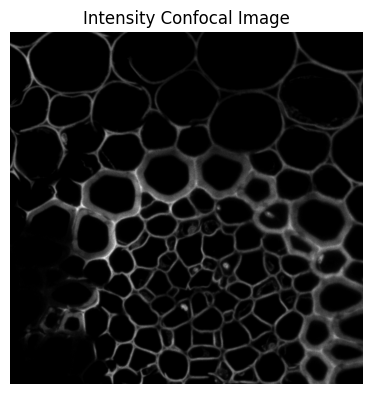

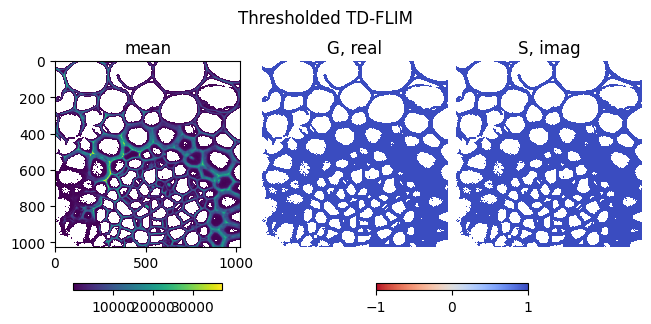

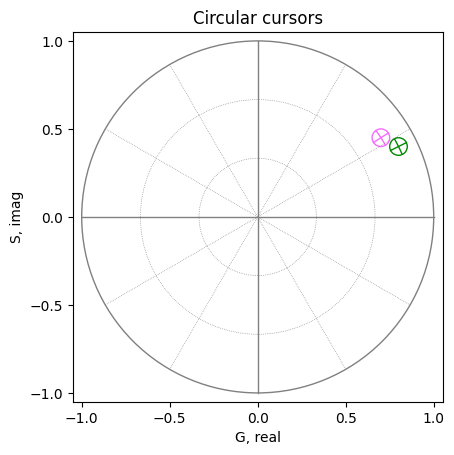

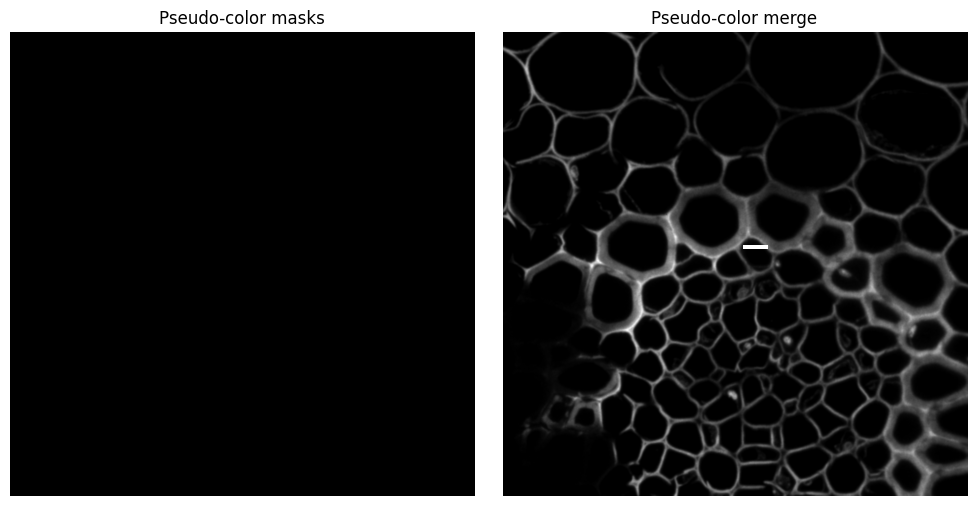

In [16]:
# Apply Gaussian blur to the entire image
sigma = 1  # standard deviation of the Gaussian kernel
blurred_image = gaussian_filter(image, sigma=sigma)

# Display original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Intensity Confocal Image")
plt.axis('off')

## Median filter
mean_mf, real_mf, imag_mf = phasor_filter_median(blurred_image, df_g, df_s, size=3, repeat=3)
## Threshold
mean_th, real_th, imag_th = phasor_threshold(mean_mf, real_mf, imag_mf, mean_min=7)


cursors_real = [0.8, 0.7]
cursors_imag = [0.4, 0.45]
radius = [0.05, 0.05]

circular_mask = mask_from_circular_cursor(
    real_th, imag_th, cursors_real, cursors_imag, radius=radius
)

########## Plot

plot_phasor_image(mean_th, real_th, imag_th, title='Thresholded TD-FLIM')

plot = PhasorPlot(allquadrants=True, title='Circular cursors')
plot.hist2d(real_th, imag_th, cmap='Greys')
for i in range(len(cursors_real)):
    plot.cursor(
        cursors_real[i],
        cursors_imag[i],
        radius=radius[i],
        color=CATEGORICAL[i+2],
        linestyle='-',
    )
#plt.xlim(0.6, 0.9)
#plt.ylim(0.3, 0.5)
plot.show()



pseudo_color_masks = pseudo_color(*circular_mask, intensity = None, colors=CATEGORICAL[2:])
pseudo_color_merge = pseudo_color(*circular_mask, intensity = blurred_image, colors=CATEGORICAL[2:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.set_title('Pseudo-color masks')
ax1.imshow(pseudo_color_masks)
ax1.axis('off')

ax2.set_title('Pseudo-color merge')
ax2.imshow(pseudo_color_merge)
ax2.axis('off')

# Add the scale bar
scalebar_width = 55.5  # in pixels
scalebar_height = 8  # in pixels
bar_color = 'white'  # or 'black' depending on your image

# Position: bottom left with a 10-pixel margin
x_pos = 530
y_pos = 470

scalebar = patches.Rectangle((x_pos, y_pos), scalebar_width, scalebar_height,
                             linewidth=0, edgecolor=None, facecolor=bar_color)
ax2.add_patch(scalebar)

plt.tight_layout()
plt.show()

## Lets show the temporal blurring

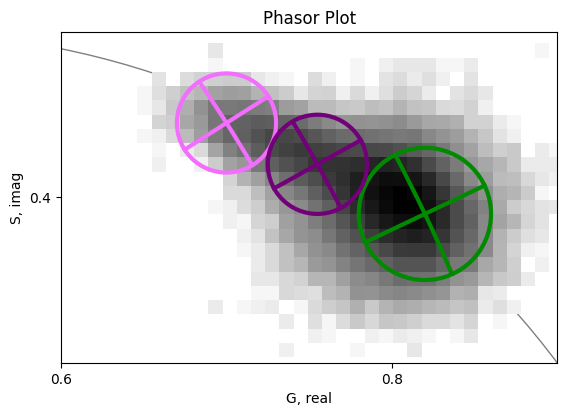

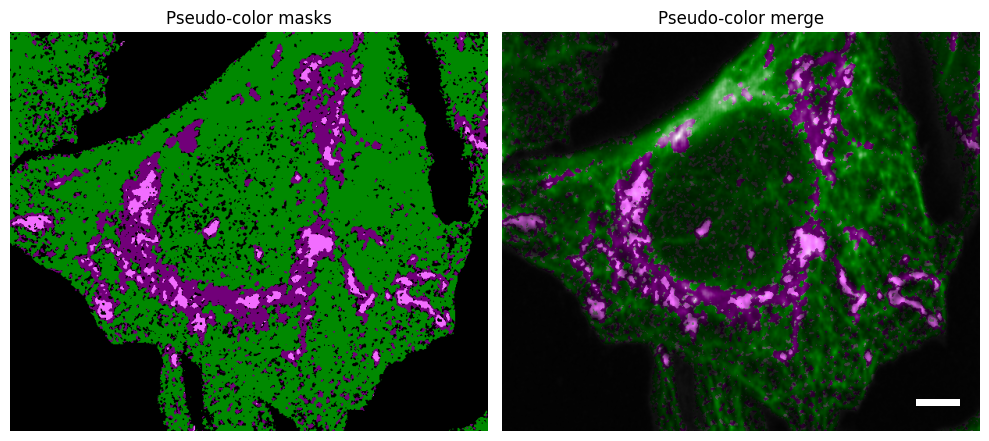

In [ ]:

cursors_real = [0.82, 0.7, 0.755]
cursors_imag = [0.39, 0.445, 0.42]
radius = [0.04, 0.03, 0.03]

circular_mask = mask_from_circular_cursor(
    real_th, imag_th, cursors_real, cursors_imag, radius=radius
)


plot = PhasorPlot(allquadrants=False, title='Phasor Plot')
plot.hist2d(real_th, imag_th, cmap='Grays')
plt.xlim(0.6, 0.9)
plt.ylim(0.3, 0.5)
for i in range(len(cursors_real)):
    plot.cursor(
        cursors_real[i],
        cursors_imag[i],
        radius=radius[i],
        color=CATEGORICAL[i+2],
        linestyle='-', linewidth = 3
    )
plot.show()


pseudo_color_masks = pseudo_color(*circular_mask, intensity = None, colors=CATEGORICAL[2:])
pseudo_color_merge = pseudo_color(*circular_mask, intensity = blurred_image, colors=CATEGORICAL[2:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.set_title('Pseudo-color masks')
ax1.imshow(pseudo_color_masks)
ax1.axis('off')

ax2.set_title('Pseudo-color merge')
ax2.imshow(pseudo_color_merge)
ax2.axis('off')

# Add the scale bar
scalebar_width = 55.5  # in pixels
scalebar_height = 8  # in pixels
bar_color = 'white'  # or 'black' depending on your image

# Position: bottom left with a 10-pixel margin
x_pos = 530
y_pos = 470

scalebar = patches.Rectangle((x_pos, y_pos), scalebar_width, scalebar_height,
                             linewidth=0, edgecolor=None, facecolor=bar_color)
ax2.add_patch(scalebar)

plt.tight_layout()
plt.show()

## Sharpen the mean image with MSSR

progress: 100%|██████████| 7/7 [00:00<00:00, 13.50it/s]


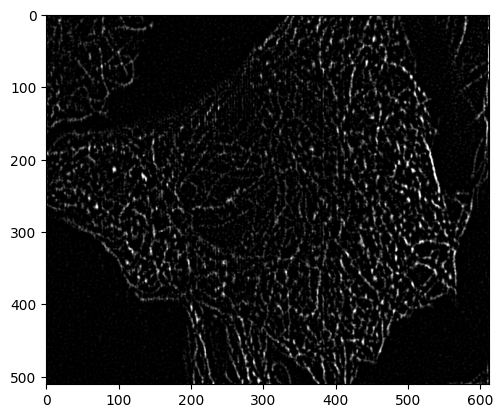

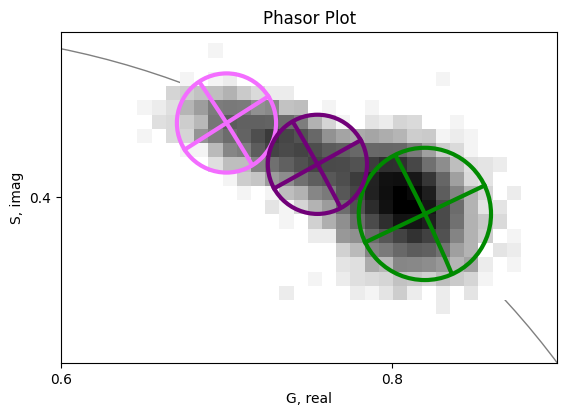

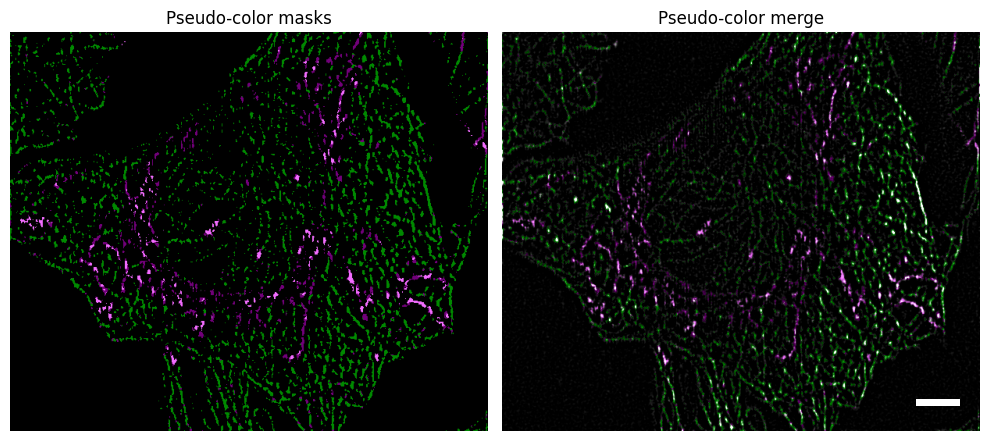

In [ ]:
#Parameters for scale bar (Change according to the size of the image analyzed)

scalebar_width = 55.5  # in pixels
scalebar_height = 8
# Position: bottom left with a 10-pixel margin
x_pos = 530
y_pos = 470
bar_color = 'white'  # or 'black' depending on your image

#Apply MSSR1
mean_mssr1 = mssr_instance.sfMSSR(img=blurred_image, fwhm=fwhm, amp=amp, order=order, mesh=mesh, ftI=ftI, intNorm=intNorm)


plt.imshow(mean_mssr1, cmap='gray', vmin=0, vmax=0.25)

## Threshold
mean_th_mssr1, real_th_mssr1, imag_th_mssr1 = phasor_threshold(mean_mssr1, real_mf, imag_mf, mean_min=0.04)

cursors_real = [0.82, 0.7, 0.755]
cursors_imag = [0.39, 0.445, 0.42]
radius = [0.04, 0.03, 0.03]

circular_mask = mask_from_circular_cursor(
    real_th_mssr1, imag_th_mssr1, cursors_real, cursors_imag, radius=radius
)


plot = PhasorPlot(allquadrants=False, title='Phasor Plot')
plot.hist2d(real_th_mssr1, imag_th_mssr1, cmap='Grays')
plt.xlim(0.6, 0.9)
plt.ylim(0.3, 0.5)
for i in range(len(cursors_real)):
    plot.cursor(
        cursors_real[i],
        cursors_imag[i],
        radius=radius[i],
        color=CATEGORICAL[i+2],
        linestyle='-', linewidth = 3
    )
plot.show()


pseudo_color_masks = pseudo_color(*circular_mask, intensity = None, colors=CATEGORICAL[2:])
pseudo_color_merge = pseudo_color(*circular_mask, intensity = mean_mssr1, colors=CATEGORICAL[2:], vmin=0, vmax=0.25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.set_title('Pseudo-color masks')
ax1.imshow(pseudo_color_masks)
ax1.axis('off')

ax2.set_title('Pseudo-color merge')
ax2.imshow(pseudo_color_merge)
ax2.axis('off')

# Add the scale bar
scalebar = patches.Rectangle((x_pos, y_pos), scalebar_width, scalebar_height,
                             linewidth=0, edgecolor=None, facecolor=bar_color)
ax2.add_patch(scalebar)

plt.tight_layout()
plt.show()


# Regions of interest (Zoom)

(100, 100)


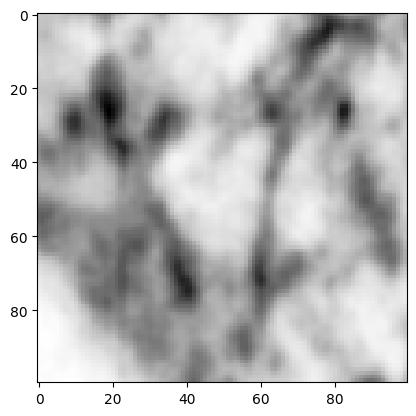

In [ ]:
#ROI1 rows: 260 to 340 , columns: 80 to 160
#ROI2 rows: 330:430 , columns: 300:400
#ROI3 rows: 40:140 , columns: 360:460

roi1_blurred = blurred_image[260:340, 80:160]
roi1_mean_th = mean_th[260:340, 80:160]
roi1_real_th = real_th[260:340, 80:160]
roi1_imag_th = imag_th[260:340, 80:160]

roi2_blurred = blurred_image[330:430, 300:400]
roi2_mean_th = mean_th[330:430, 300:400]
roi2_real_th = real_th[330:430, 300:400]
roi2_imag_th = imag_th[330:430, 300:400]

roi3_blurred = blurred_image[40:140, 360:460]
roi3_mean_th = mean_th[40:140, 360:460]
roi3_real_th = real_th[40:140, 360:460]
roi3_imag_th = imag_th[40:140, 360:460]

plt.imshow(roi3_mean_th, cmap = "Grays")
print(roi2_mean_th.shape)

## Phasors from ROIs

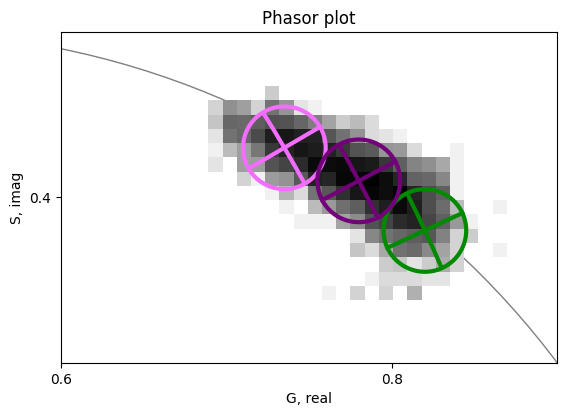

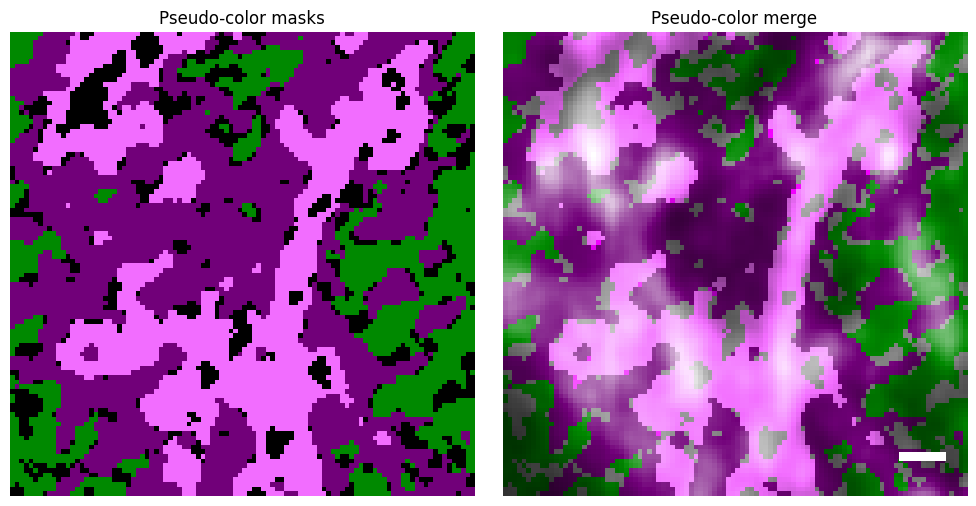

In [ ]:
mean_th_zoom = roi3_mean_th  #change the name of the roi to be used, e.g for the roi1 use roi1_...
real_th_zoom = roi3_real_th
imag_th_zoom = roi3_imag_th
intensity = mean_th_zoom

#Cursors for
#ROI1_real [0.815, 0.72, 0.77]
#ROI1_imag [0.39, 0.44, 0.415]
#ROI1_radii [0.027, 0.027, 0.027]
#ROI2_real [0.825, 0.72, 0.77]
#ROI2_imag [0.39, 0.44, 0.41]
#ROI2_radii [0.03, 0.03, 0.03]
#ROI3_real [0.82, 0.735, 0.78]
#ROI3_imag [0.38, 0.43, 0.41]
#ROI3_radii [0.025, 0.025, 0.025]

#Parameters for scale bar (Change according to the size of the image analyzed)

scalebar_width = 10  # in pixels
scalebar_height = 2
# Position: bottom left with a 10-pixel margin
x_pos = 85
y_pos = 90
bar_color = 'white'  # or 'black' depending on your image

cursors_real = [0.82, 0.735, 0.78]
cursors_imag = [0.38, 0.43, 0.41]
radius = [0.025, 0.025, 0.025]

circular_mask = mask_from_circular_cursor(
    real_th_zoom, imag_th_zoom, cursors_real, cursors_imag, radius=radius
)


plot = PhasorPlot(allquadrants=False, title='Phasor plot')
plot.hist2d(real_th_zoom, imag_th_zoom, cmap='Greys')
plt.xlim(0.6, 0.9)
plt.ylim(0.3, 0.5)
for i in range(len(cursors_real)):
    plot.cursor(
        cursors_real[i],
        cursors_imag[i],
        radius=radius[i],
        color=CATEGORICAL[i+2],
        linestyle='-', linewidth = 3
    )
plot.show()


pseudo_color_masks = pseudo_color(*circular_mask, intensity = None, colors=CATEGORICAL[2:])
pseudo_color_merge = pseudo_color(*circular_mask, intensity = intensity, colors=CATEGORICAL[2:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.set_title('Pseudo-color masks')
ax1.imshow(pseudo_color_masks)
ax1.axis('off')

ax2.set_title('Pseudo-color merge')
ax2.imshow(pseudo_color_merge)
ax2.axis('off')

# Add the scale bar
scalebar = patches.Rectangle((x_pos, y_pos), scalebar_width, scalebar_height,
                             linewidth=0, edgecolor=None, facecolor=bar_color)
ax2.add_patch(scalebar)

plt.tight_layout()
plt.show()

## Sharpen ROIs with MSSR

progress: 100%|██████████| 7/7 [00:00<00:00, 669.76it/s]


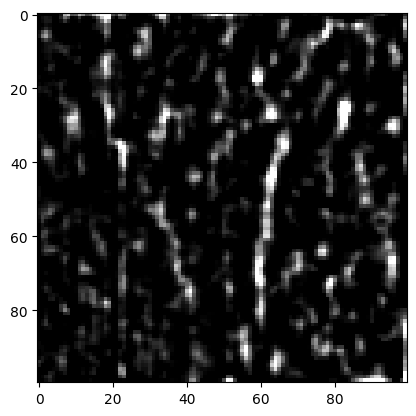

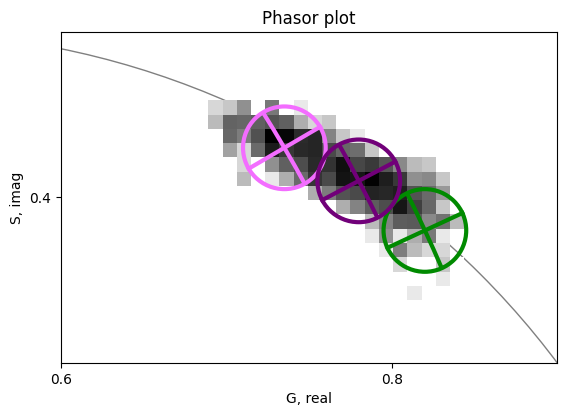

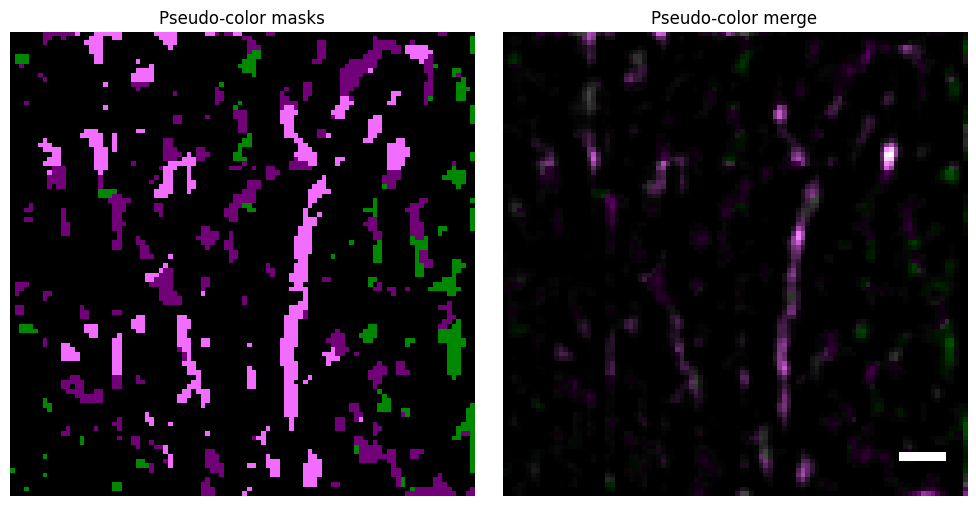

In [ ]:
#Apply MSSR1

mean_mssr1_zoom = mssr_instance.sfMSSR(img=mean_th_zoom, fwhm=fwhm, amp=amp, order=order, mesh=mesh, ftI=ftI, intNorm=intNorm)
intensity = mean_mssr1_zoom

plt.imshow(mean_mssr1_zoom, cmap='gray', vmin=0, vmax=0.25)

#Parameters for scale bar (Change according to the size of the image analyzed)

scalebar_width = 10  # in pixels
scalebar_height = 2
# Position: bottom left with a 10-pixel margin
x_pos = 85
y_pos = 90
bar_color = 'white'  # or 'black' depending on your image

## Threshold
mean_th_mssr1_zoom, real_th_mssr1_zoom, imag_th_mssr1_zoom = phasor_threshold(mean_mssr1_zoom, real_th_zoom, imag_th_zoom, mean_min=0.04)

## Masks from phasors

circular_mask = mask_from_circular_cursor(
    real_th_mssr1_zoom, imag_th_mssr1_zoom, cursors_real, cursors_imag, radius=radius
)


plot = PhasorPlot(allquadrants=False, title='Phasor plot')
plot.hist2d(real_th_mssr1_zoom, imag_th_mssr1_zoom, cmap='Greys')
plt.xlim(0.6, 0.9)
plt.ylim(0.3, 0.5)
for i in range(len(cursors_real)):
    plot.cursor(
        cursors_real[i],
        cursors_imag[i],
        radius=radius[i],
        color=CATEGORICAL[i+2],
        linestyle='-', linewidth = 3
    )
plot.show()


pseudo_color_masks = pseudo_color(*circular_mask, intensity = None, colors=CATEGORICAL[2:])
pseudo_color_merge = pseudo_color(*circular_mask, intensity = intensity, colors=CATEGORICAL[2:])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

ax1.set_title('Pseudo-color masks')
ax1.imshow(pseudo_color_masks)
ax1.axis('off')

ax2.set_title('Pseudo-color merge')
ax2.imshow(pseudo_color_merge)
ax2.axis('off')

# Add the scale bar
scalebar = patches.Rectangle((x_pos, y_pos), scalebar_width, scalebar_height,
                             linewidth=0, edgecolor=None, facecolor=bar_color)
ax2.add_patch(scalebar)

plt.tight_layout()
plt.show()


# Lifetime maps

In [ ]:
## Funtion to calculate the modulation and phase


def mode_and_phase(G,S,laser_period_in_seconds, harmonic = 1, colour = 'PRGn'):
    from matplotlib.ticker import FormatStrFormatter
    import matplotlib.cm as cm
    # A function to calculate the modulation, phase delay
    T = laser_period_in_seconds
    T_nano = T*1e9          #to show in nanoseconds
    n = harmonic # number of harmonic (default 1)
    w = (2 * np.pi * n) / T
    w_nano = (2 * np.pi) / T_nano
    # Setting epsilon to avoid division by zero
    #epsilon = np.nan

    #G = np.where(G > 0, G, epsilon)
    #S = np.where(S > 0, S, epsilon)

    mod = np.sqrt(G**2 + S**2)
    phi = np.arctan2(S,G)

    #mod_min = np.min(mod)
    #mod_max = np.max(mod)

    phi_max = np.max(phi)
    phi_min = np.min(phi)

    #Phase correction
    quarter_pi = np.arctan(1)
    phi[phi==quarter_pi] = 0

    #Output figure

    titlesize = 18
    suptitle = 20
    axsize = 18
    ticksize = 18

    # Create a colormap that sets NaNs to black
    cmap = plt.colormaps.get_cmap(colour).copy()
    cmap.set_bad(color='black')

    ##Images of TD_FLIM and the phasor plot
    f, ax = plt.subplots(1,2, figsize = (14,6)) #(7,4.5)

    #Modulation Map
    im00 = ax[0].imshow(mod, cmap=cmap)
    ax[0].axis('off')
    ax[0].set_title('Modulation Map', fontsize=titlesize)
    cbar00 = f.colorbar(im00, ax = ax[0], fraction=0.046, pad=0.04)
    cbar00.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cbar00.set_label('Modulation [a.u.]', fontsize=axsize)
    cbar00.ax.tick_params(labelsize=ticksize)  # Adjust tick label size
    #ax[0].legend(bbox_to_anchor=(1.5, -0.2), loc='lower center', ncol=2, fontsize = ticksize) #-0.2
    #ax[0,0].set_box_aspect(1)

    #Phase Map
    im01 = ax[1].imshow(phi, cmap=cmap)
    ax[1].axis('off')
    ax[1].set_title('Phase Map', fontsize=titlesize)
    cbar01 = f.colorbar(im01, ax = ax[1], fraction=0.046, pad=0.04)
    cbar01.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cbar01.set_label('Phase angle [rad]', fontsize=axsize)
    cbar01.ax.tick_params(labelsize=ticksize)  # Adjust tick label size
    #ax[0,1].set_box_aspect(1)

    f.suptitle('Modulation and Phase maps',x=0.5, y=0.99, fontsize = suptitle)
    f.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9, bottom=0.1, left=0.05, right=0.95)
    plt.show()

    return mod, phi, f

## Function to calculate the lifetime maps

def lifetime_maps(G, S, laser_period_in_seconds, harmonic=1, colour='PRGn'):
    from matplotlib.ticker import FormatStrFormatter
    import matplotlib.cm as cm
    """
    Compute and plot modulation and phase lifetime maps side-by-side.

    Parameters:
    G, S : 2D arrays
        G and S phasor components.
    laser_period_in_seconds : float
        Laser repetition period in seconds.
    harmonic : int, optional
        Harmonic number (default is 1).
    colour : str, optional
        Name of matplotlib colormap to use.

    Returns:
    tau_m, tau_p : 2D arrays
        Modulation and phase lifetime maps in nanoseconds.
    fig : matplotlib.figure.Figure
        The generated figure.
    """
    # Constants
    T = laser_period_in_seconds
    T_nano = T * 1e9
    n = harmonic
    w = (2 * np.pi * n) / T
    w_nano = (2 * np.pi * n) / T_nano

    # Lifetime calculations
    mod = np.sqrt(G**2 + S**2)
    tau_m = (1 / w) * np.sqrt(np.maximum((1 / (mod**2)) - 1, 0)) * 1e9  # ns
    tau_p = (1 / w) * (S / G) * 1e9  # ns

    # Create colormap with NaNs as black
    cmap = cm.get_cmap(colour).copy()
    cmap.set_bad(color='black')

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14,6))

    im0 = axs[0].imshow(tau_m, cmap=cmap)
    axs[0].set_title('Modulation Lifetime', fontsize=18)
    axs[0].axis('off')
    cbar0 = plt.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)
    cbar0.set_label('[ns]', fontsize=18)
    cbar0.ax.tick_params(labelsize=20)

    im1 = axs[1].imshow(tau_p, cmap=cmap)
    #axs[1].set_title('Phase Lifetime', fontsize=18)
    axs[1].axis('off')
    cbar1 = plt.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)
    cbar1.set_label('[ns]', fontsize=18)
    cbar1.ax.tick_params(labelsize=20)

    fig.suptitle('Lifetime maps',x=0.5, y=0.99, fontsize = 20)

    plt.tight_layout()
    plt.show()

    return tau_m, tau_p, fig

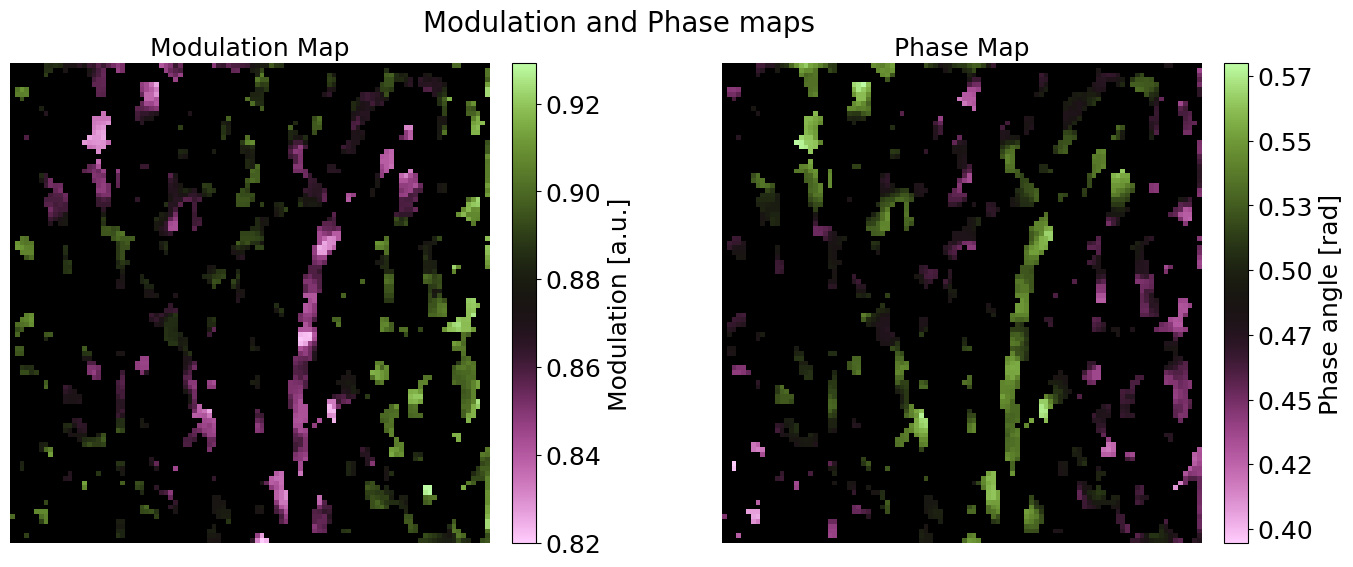

<ipython-input-133-5832bfeae105>:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colour).copy()


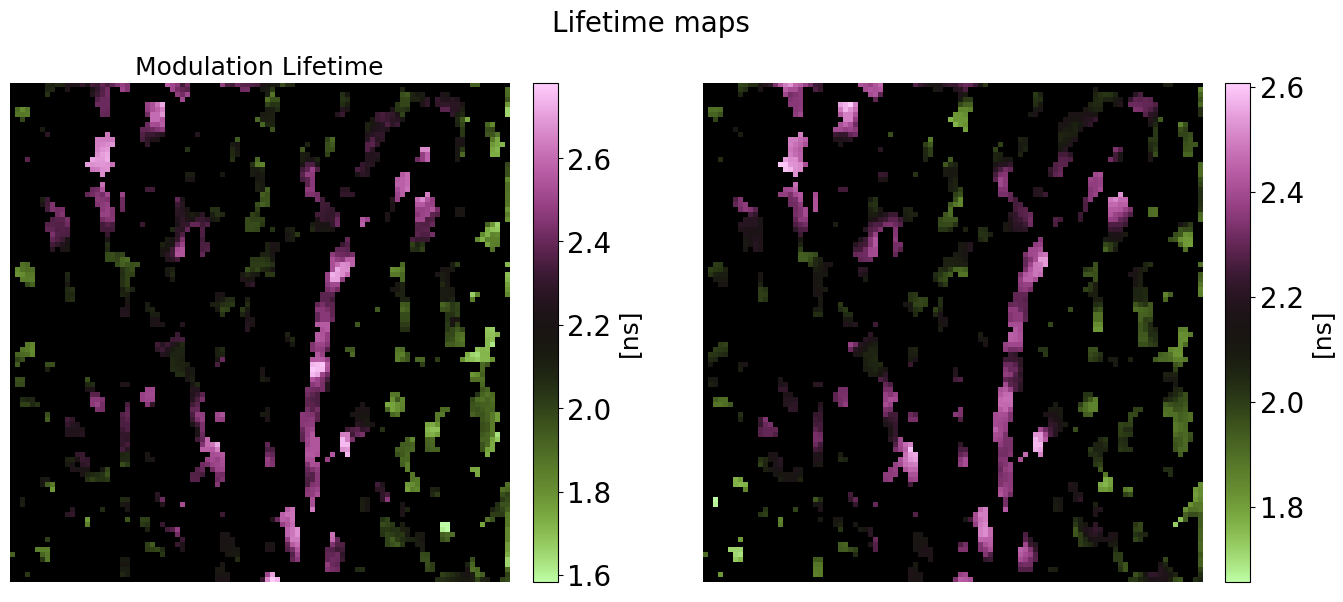

In [ ]:
import cmcrameri.cm as cmc

# Parameters


# Parameters for TD-FLIM figure
T = (1 / frequency) * 1e3
T_nano = T*1e9
laser_period_in_seconds = T * 1e-9

color_1 = 'cmc.vanimo'
color_2 = 'cmc.vanimo_r'

mean_th_mssr1, real_th_mssr1, imag_th_mssr1

#Modulation and Phase
mod, phase, f_mod_phi = mode_and_phase(real_th_mssr1_zoom,imag_th_mssr1_zoom,laser_period_in_seconds, harmonic = 1, colour = color_1)

# Lifetime maps
tau_m, tau_p, fig = lifetime_maps(real_th_mssr1_zoom, imag_th_mssr1_zoom,laser_period_in_seconds, harmonic = 0.5, colour = color_2)

In [ ]:
print(image.shape)

(511, 612)
